<a href="https://colab.research.google.com/github/James606240/NTUT_Test/blob/main/wav_vs_flac_vs_mp3_vs_aac.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [134]:
# 8分鐘簡報

In [135]:
!pip install pydub #音源轉檔參數安裝
from pydub import AudioSegment

import math
import wave
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.io.wavfile import read, write
from IPython.display import Audio
from numpy.fft import fft, ifft
import pylab as plt

%matplotlib inline

In [136]:
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib as mpl
import matplotlib.pyplot as plt 
from matplotlib.font_manager import fontManager

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

--2022-01-09 12:39:34--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 142.251.8.138, 142.251.8.100, 142.251.8.113, ...
Connecting to drive.google.com (drive.google.com)|142.251.8.138|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/cf9t9v46i72fk1n3qk4djodecq7h4f3e/1641731925000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2022-01-09 12:39:35--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/cf9t9v46i72fk1n3qk4djodecq7h4f3e/1641731925000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 142.251.8.132, 2404:6800:4008:c15::84
Connecting to doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)|142.251.8.1

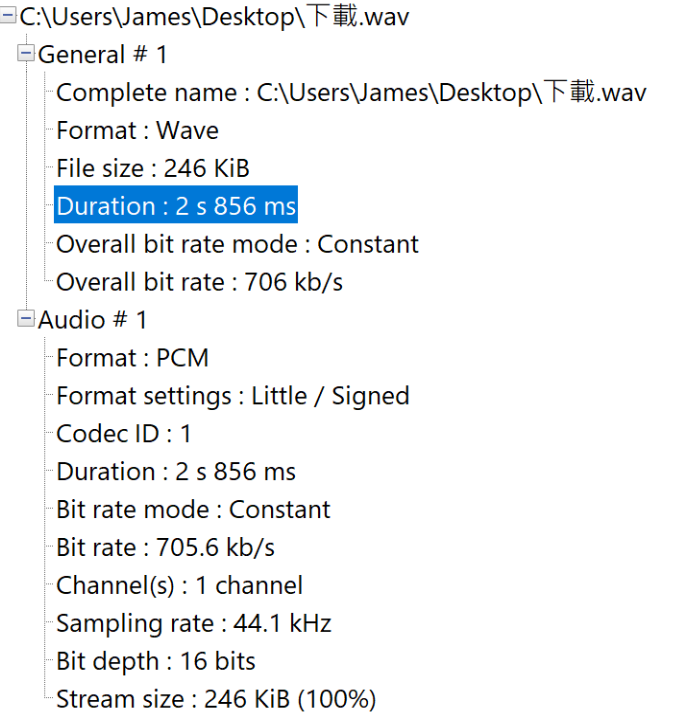

In [137]:
# test(0-2).wav載點：https://drive.google.com/file/d/1xvT1fTo4mQFwOuPLpNat352pjHCEo1Dw/view?usp=sharing

In [138]:
Fs_1, data_1 = read('/content/drive/MyDrive/@ 北科大/Colab_Notebooks/【碩一上.3】高立人_資料壓縮_Python code/期末報告/test(0-2).wav')
f_1 = wave.open(r"/content/drive/MyDrive/@ 北科大/Colab_Notebooks/【碩一上.3】高立人_資料壓縮_Python code/期末報告/test(0-2).wav", "rb")
print("【原始wav檔】")
print("　￭ 格式： wav檔")
print("　￭ 取樣頻率(framerate)：",format(Fs_1),"HZ")
print("　￭ 類型：",format(data_1.dtype))
params = f_1.getparams ()
nchannels, sampwidth, framerate, nframes = params[:4]
print("　￭ 通道數：",nchannels,"通道")
print("　￭ 點數：",nframes)
print("　￭ 位元深度：",sampwidth*8,"位元")
print("　￭ 時間長：",nframes/framerate,"秒")

wav = os.path.getsize('/content/drive/MyDrive/@ 北科大/Colab_Notebooks/【碩一上.3】高立人_資料壓縮_Python code/期末報告/test(0-2).wav')
print("　￭ 資料大小：",wav/1000,"KB")

print("　￭ 播放器：")
print("　  (共2秒)0-1秒：－；1-2秒：測試")
Audio(data_1, rate=Fs_1)

【原始wav檔】
　￭ 格式： wav檔
　￭ 取樣頻率(framerate)： 44100 HZ
　￭ 類型： int16
　￭ 通道數： 1 通道
　￭ 點數： 125952
　￭ 位元深度： 16 位元
　￭ 時間長： 2.8560544217687074 秒
　￭ 資料大小： 251.982 KB
　￭ 播放器：
　  (共2秒)0-1秒：－；1-2秒：測試


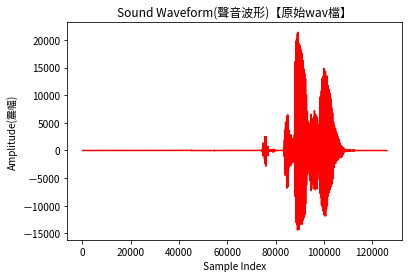

In [139]:
plt.figure()
plt.plot(data_1,color='r')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude(震幅)') #震幅
plt.title('Sound Waveform(聲音波形)【原始wav檔】') #聲音波形
plt.show()

In [140]:
#音源轉檔(wav轉flac)
song = AudioSegment.from_file('/content/drive/MyDrive/@ 北科大/Colab_Notebooks/【碩一上.3】高立人_資料壓縮_Python code/期末報告/test(0-2).wav')
song.export("test.flac",format = "flac")
print("【新flac檔】")
print("　￭ 取樣音源格式： flac檔")
flac = os.path.getsize('/content/test.flac')
print("　￭ 取樣音源資料大小：",flac/1000,"KB")

#音源轉檔(flac轉wav)
song = AudioSegment.from_file('/content/test.flac')
song.export("test(flac_back_wav).wav",format = "wav")
Fs_2, data_2 = read('/content/test(flac_back_wav).wav')
f_2 = wave.open(r"/content/test(flac_back_wav).wav", "rb")
print("")
print("【新wav檔(wav轉flac轉wav)】")
print("　￭ 格式： wav檔")
print("　￭ 取樣頻率(framerate)：",format(Fs_2),"HZ")
print("　￭ 類型：",format(data_2.dtype))
params = f_2.getparams ()
print("　￭ 通道數：",nchannels,"通道")
print("　￭ 點數：",nframes)
print("　￭ 位元深度：",sampwidth*8,"位元")
print("　￭ 時間長：",nframes/framerate,"秒")
wav = os.path.getsize('/content/test(flac_back_wav).wav')
print("　￭ 資料大小：",wav/1000,"KB")

print("　￭ 播放器：")
print("　  (共2秒)0-1秒：－；1-2秒：測試")
Audio(data_2, rate=Fs_2)

【新flac檔】
　￭ 取樣音源格式： flac檔
　￭ 取樣音源資料大小： 61.988 KB

【新wav檔(wav轉flac轉wav)】
　￭ 格式： wav檔
　￭ 取樣頻率(framerate)： 44100 HZ
　￭ 類型： int16
　￭ 通道數： 1 通道
　￭ 點數： 125952
　￭ 位元深度： 16 位元
　￭ 時間長： 2.8560544217687074 秒
　￭ 資料大小： 251.948 KB
　￭ 播放器：
　  (共2秒)0-1秒：－；1-2秒：測試


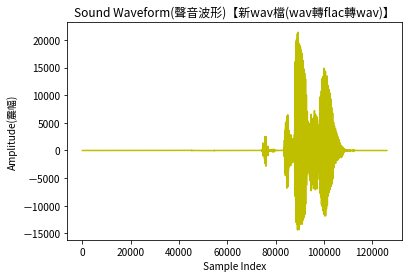

In [141]:
plt.figure()
plt.plot(data_2,color='y')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude(震幅)') #震幅
plt.title('Sound Waveform(聲音波形)【新wav檔(wav轉flac轉wav)】') #聲音波形
plt.show()

In [142]:
#音源轉檔(wav轉mp3)
song = AudioSegment.from_file('/content/drive/MyDrive/@ 北科大/Colab_Notebooks/【碩一上.3】高立人_資料壓縮_Python code/期末報告/test(0-2).wav')
song.export("test.mp3",format = "mp3")
print("【新mp3檔】")
print("　￭ 格式： mp3檔")
mp3 = os.path.getsize('/content/test.mp3')
print("　￭ 資料大小：",mp3/1000,"KB")

#音源轉檔(mp3轉wav)
song = AudioSegment.from_file('/content/test.mp3')
song.export("test(mp3_back_wav).wav",format = "wav")
Fs_3, data_3 = read('/content/test(mp3_back_wav).wav')
f_3 = wave.open(r"/content/test(mp3_back_wav).wav", "rb")
print("")
print("【新wav檔(wav轉mp3轉wav)】")
print("　￭ 格式： wav檔")
print("　￭ 取樣頻率(framerate)：",format(Fs_3),"HZ")
print("　￭ 類型：",format(data_3.dtype))
params = f_3.getparams ()
print("　￭ 通道數：",nchannels,"通道")
print("　￭ 點數：",nframes)
print("　￭ 位元深度：",sampwidth*8,"位元")
print("　￭ 時間長：",nframes/framerate,"秒")
wav = os.path.getsize('/content/test(mp3_back_wav).wav')
print("　￭ 資料大小：",wav/1000,"KB")

print("　￭ 播放器：")
print("　  (共2秒)0-1秒：－；1-2秒：測試")
Audio(data_3, rate=Fs_3)

【新mp3檔】
　￭ 格式： mp3檔
　￭ 資料大小： 23.423 KB

【新wav檔(wav轉mp3轉wav)】
　￭ 格式： wav檔
　￭ 取樣頻率(framerate)： 44100 HZ
　￭ 類型： int16
　￭ 通道數： 1 通道
　￭ 點數： 125952
　￭ 位元深度： 16 位元
　￭ 時間長： 2.8560544217687074 秒
　￭ 資料大小： 251.948 KB
　￭ 播放器：
　  (共2秒)0-1秒：－；1-2秒：測試


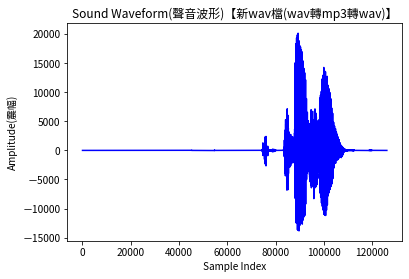

In [143]:
plt.figure()
plt.plot(data_3,color='b')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude(震幅)') #震幅
plt.title('Sound Waveform(聲音波形)【新wav檔(wav轉mp3轉wav)】') #聲音波形
plt.show()

In [144]:
#音源轉檔(wav轉aac)
song = AudioSegment.from_file('/content/drive/MyDrive/@ 北科大/Colab_Notebooks/【碩一上.3】高立人_資料壓縮_Python code/期末報告/test(0-2).wav')
song.export("test.aac",format= "adts")
print("【新aac檔】")
print("　￭ 格式： aac檔")
aac = os.path.getsize('/content/test.aac')
print("　￭ 資料大小：",aac/1000,"KB")

#音源轉檔(aac轉wav)
song = AudioSegment.from_file('/content/test.aac')
song.export("test(aac_back_wav).wav",format = "wav")
Fs_4, data_4 = read('/content/test(aac_back_wav).wav')
f_4 = wave.open(r"/content/test(aac_back_wav).wav", "rb")
print("")
print("【新wav檔(wav轉aac轉wav)】")
print("　￭ 格式： wav檔")
print("　￭ 頻率(framerate)：",format(Fs_4),"HZ")
print("　￭ 類型：",format(data_4.dtype))
params = f_4.getparams ()
print("　￭ 通道數：",nchannels,"通道")
print("　￭ 點數：",nframes)
print("　￭ 位元深度：",sampwidth*8,"位元")
print("　￭ 時間長：",nframes/framerate,"秒")
wav = os.path.getsize('/content/test(aac_back_wav).wav')
print("　￭ 資料大小：",wav/1000,"KB")

print("　￭ 播放器：")
print("　  (共2秒)0-1秒：－；1-2秒：測試")
Audio(data_4, rate=Fs_4)

【新aac檔】
　￭ 格式： aac檔
　￭ 資料大小： 24.655 KB

【新wav檔(wav轉aac轉wav)】
　￭ 格式： wav檔
　￭ 頻率(framerate)： 44100 HZ
　￭ 類型： int16
　￭ 通道數： 1 通道
　￭ 點數： 125952
　￭ 位元深度： 16 位元
　￭ 時間長： 2.8560544217687074 秒
　￭ 資料大小： 253.996 KB
　￭ 播放器：
　  (共2秒)0-1秒：－；1-2秒：測試


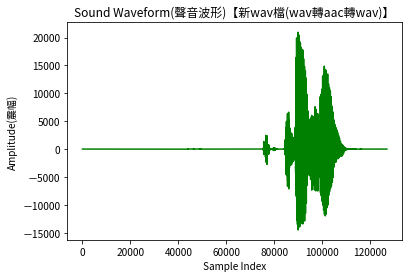

In [145]:
plt.figure()
plt.plot(data_4,color='g')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude(震幅)') #震幅
plt.title('Sound Waveform(聲音波形)【新wav檔(wav轉aac轉wav)】') #聲音波形
plt.show()